# assignment09 20124602
# https://github.com/antivec/assignment09

# import libraries

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# read mnist datas for file

In [95]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()


In [96]:
size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# normalize the values of the input data to be [0, 1]

In [97]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


# distance function between two vectors x and y

In [98]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# make a matrix each column of which represents an images in a vector form 

In [99]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

# save mnist training data in the list

In [100]:
count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

In [101]:
count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

In [102]:
im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

In [103]:
for i in range(num_train):
    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

In [104]:
f4 = plt.figure(4)
im_test_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_test_count    = np.zeros(10, dtype=int)

<Figure size 432x288 with 0 Axes>

In [105]:
for i in range(num_test):
    im_test_average[:, list_label_test[i]] += list_image_test[:, i]
    im_test_count[list_label_test[i]] += 1

# Define Model parameter
\begin{equation*}
\ {\theta} = (\theta_1,\theta_2,....,\theta_n)
\end{equation*}

In [117]:
x = np.linspace(0,9,7840)
train_arr = im_average.reshape(7840,1)
y = np.empty(7840,dtype = float)
for i in range(np.size(train_arr)):
    y[i] = train_arr[i]

In [161]:
Model_parameter = np.polyfit(x,y,0)
p1 = np.poly1d(Model_parameter)
f = np.polyval(p1,x)
LeastFitError = np.sum(y-f)
for p in range(10):
    pf = np.polyfit(x,y,p)
    p1 = np.poly1d(pf)
    f = np.polyval(p1,x)
    tmpError = np.sum(y-f)
    if(LeastFitError > tmpError):
        LeastFitError = tmpError
        Model_parameter = np.polyfit(x,y,p)
    else:
        pass

In [126]:
print(LeastFitError)
print(Model_parameter)    

-5.827889253851026e-05
[ 1.85864254e-02 -7.76154149e-01  1.36439183e+01 -1.30321152e+02
  7.26128300e+02 -2.34242516e+03  4.02022855e+03 -2.90786593e+03
  6.91775649e+02 -2.35518104e+01]


# expected non-0 turned out to be non-0 -> TN
#   (-) & (-)

# expected 0 turned out to be 0 -> TP
#   (+) & (+)

# expected 0 turned out to be non-0 -> FP
#   (+) & (-)

# expected non-0 turned out to be 0 -> FN
#   (-) & (+)

# use training mnist-data

In [175]:
list_positive_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_positive_label_train    = np.empty(num_train, dtype=int)

list_negative_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_negative_label_train    = np.empty(num_train, dtype=int)

positive_party = 0
negative_party = 0

for i in range(num_train):
    if(list_label_train[i] == 0):
        list_positive_label_train[positive_party]     = list_label_train[i] 
        list_positive_image_train[:,positive_party]  = list_image_train[:,i]        
        positive_party +=1
    else:
        list_negative_label_train[negative_party]     = list_label_train[i]
        list_negative_image_train[:, negative_party]  = list_image_train[:,i]   
        negative_party +=1

5923 54077


# Test sample whether classified ok

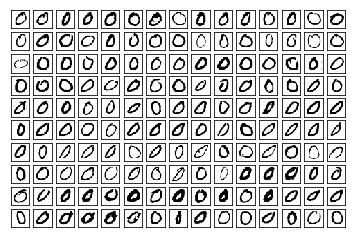

In [169]:
for i in range(150):
    positive_label       = list_positive_label_train[i]
    positive_im_vector   = list_positive_image_train[:, i]
    positive_im_matrix   = positive_im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
   # plt.title(positive_label)
    plt.imshow(positive_im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

# generate random vector data
\begin{equation*}
\ r_{i} \sim N(0,{\delta}),
\ {\delta} = 1
\end{equation*}

In [170]:
random_v = np.random.normal(0,1,784)

# Feature function
# random_mul =
\begin{equation*}
\ f(x) = { r^T_{i}}  {x}
\end{equation*}

In [171]:
random_mul    = np.empty((size_row * size_col, 10), dtype=float)

for i in range(10):
    random_mul[:,i] = random_v.transpose() * im_average[:,i] 

# Partition function
\begin{equation*}
\tilde{f_n(x;\theta)}  = \theta_{1}f_{1}(x) + ... +\theta_{n}f_{n}(x)
\end{equation*}

# Classifier 
\begin{equation*}
\hat{f(x)}  = sign(\tilde{f(x)})
\begin{cases}
    +1       & \quad \text{if }  \text{ x } \geq \text{0} \\
    -1       & \quad \text{if }  \text{ x < 0}
  \end{cases}
\end{equation*}

In [172]:
partition_func = np.empty((size_row * size_col, 10), dtype=float)
sign_partition = np.empty((10,))
for i in range(10):
    partition = 0
    part = random_mul[:,i] * Model_parameter[i]
    for j in range(np.size(part)):
        partition += part[j]    
        sign_partition.put(i,np.sign(partition))

                          
for i in range(np.size(sign_partition)):
    print(sign_partition[i])

-1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0


# Plot
\begin{equation*}
\ \tilde{f(x;\theta)}
\end{equation*}

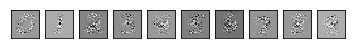

In [173]:
for i in range(10):
    lzero = normalize(random_mul[:,i] * Model_parameter[i])
    lzero_im_matrix   = lzero.reshape((size_row, size_col))
    plt.subplot(1,10, i+1)
    plt.imshow(lzero_im_matrix, cmap='Greys', interpolation='None')
    plt.xticks(())
    plt.yticks(())